In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import autots as at
import yfinance as yf
import plotly.express as px

In [5]:
data = yf.download("BTC-USD",
                  start = "2020-01-01",
                  end = "2022-04-07",
                  progress = False)
data = pd.DataFrame(data)
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-02,46285.500000,47028.281250,45782.511719,45868.949219,45868.949219,29336594194
2022-04-03,45859.128906,47313.476562,45634.105469,46453.566406,46453.566406,25414397610
2022-04-04,46445.273438,46791.089844,45235.816406,46622.675781,46622.675781,32499785455
2022-04-05,46624.507812,47106.140625,45544.808594,45555.992188,45555.992188,29640604055
2022-04-06,45544.355469,45544.355469,43193.953125,43206.738281,43206.738281,39393395788


In [6]:
res_data = data.reset_index()
res_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,7294.438965,7335.290039,7169.777832,7193.599121,7193.599121,21167946112
1,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
3,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
4,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275


In [7]:
res_data.to_csv("History_data3")

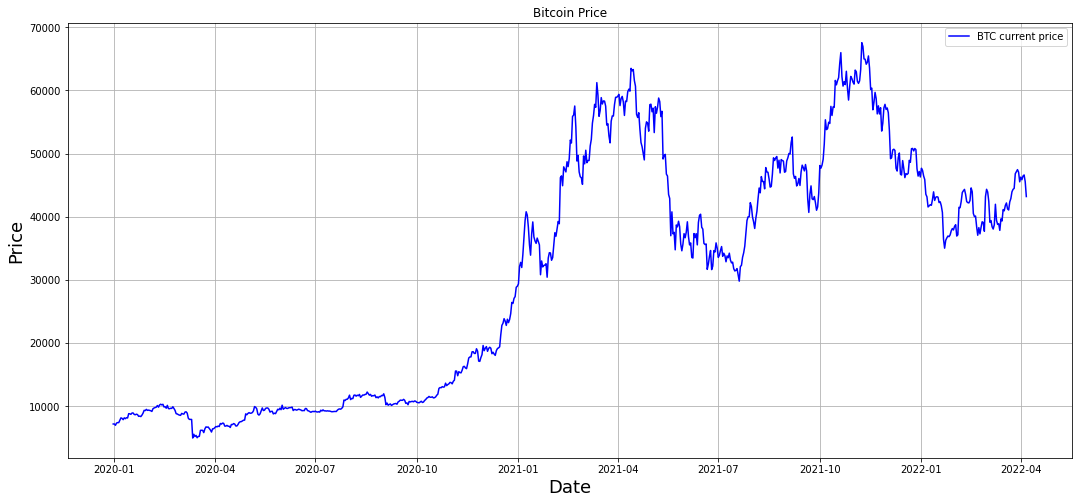

In [7]:
res_data = res_data[["Date", "Close"]]
res_data["Date"] = pd.to_datetime(res_data.Date)
# px.line(res_data['Close'], x=res_data['Date'], y=res_data['Close'], title='Crypto forecast')

# res_data["Close"].plot(figsize=(16, 8), title="BTC Current Prices", fontsize=15, label="Close Price")

plt.figure(figsize = (18, 8))
plt.grid(True)
plt.plot(data['Close'], color = 'blue', label='BTC current price')
plt.title('Bitcoin Price')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price', fontsize = 18)
plt.legend()
plt.show()
# plt.legend()
# plt.grid()
# plt.show()

In [21]:
from autots import AutoTS
model = AutoTS(forecast_length=90, frequency='infer', 
               ensemble='simple', drop_data_older_than_periods=200)
model = model.fit(res_data, date_col='Date', value_col='Close', id_col=None)
prediction = model.predict()
forecast = prediction.forecast
print("Price prediction of Bitcoin")
print(forecast)

Inferred frequency is: D
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 6 with model DatepartRegression in generation 0 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 7 with model DatepartRegression in generation 0 of 10
Epoch 1/50
4/4 [==============================] - 9s 9ms/step - loss: 0.3838
Epoch 2/50
4/4 [==============================] - 0s 9ms/step - loss: 0.3724
Epoch 3/50
4/4 [==============================] - 0s 9ms/step - loss: 0.3704
Epoch 4/50
4/4 [==============================] - 0s 7ms/step - loss: 0.3681
Epoch 5/50
4/4 [==============================] - 0s 7ms/step - loss: 0.3638
Epoch 6/50
4/4 [==============================] - 0s 8ms/step - loss: 0.3666
Epoch 7/50
4/4 [==============================] - 0s 8ms/step - loss: 0.3675
Epoch 8/50
4/4 [==============================] - 0s 7ms/step - loss: 0.3615
Epoch 9/50
4/4 [==============================] - 0s 9ms/step - loss: 0.3596
Epoch 10/50
4/4 [==============================] - 0s 9ms/step - loss: 0.3594
Epoch 11/50
4/4 [==============================] - 0s 9ms/step - loss: 0.3553
Epoch 12/50
4/4 [==============================] - 0s 9ms/step - loss: 0.3587
Epoch

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 43 with model GLS in generation 0 of 10
Model Number: 44 with model SeasonalNaive in generation 0 of 10
Model Number: 45 with model GLM in generation 0 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 45: GLM
Model Number: 46 with model ETS in generation 0 of 10
Model Number: 47 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 47: FBProphet
Model Number: 48 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 48: GluonTS
Model Number: 49 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 49: UnobservedComponents
Model Number: 50 with

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\util

Model Number: 64 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 64: GluonTS
Model Number: 65 with model UnivariateMotif in generation 0 of 10
Model Number: 66 with model WindowRegression in generation 0 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 66: WindowRegression
Model Number: 67 with model GLM in generation 0 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 67: GLM
Model Number: 68 with model LastValueNaive in generation 0 of 10
Model Number: 69 with model SectionalMotif in generation 0 of 10
Model Number: 70 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 70: VE

Epoch 8/100
2/2 [==============================] - 0s 79ms/step - loss: 1890.1307 - val_loss: 1382.4485
Epoch 9/100
2/2 [==============================] - 0s 74ms/step - loss: 1890.0568 - val_loss: 1382.4495
Epoch 10/100
2/2 [==============================] - 0s 73ms/step - loss: 1890.2733 - val_loss: 1382.4376
Epoch 11/100
2/2 [==============================] - 0s 74ms/step - loss: 1890.1622 - val_loss: 1382.4591
Epoch 12/100
2/2 [==============================] - 0s 80ms/step - loss: 1890.3020 - val_loss: 1382.4663
Epoch 13/100
2/2 [==============================] - 0s 78ms/step - loss: 1890.2429 - val_loss: 1382.4537
Epoch 14/100
2/2 [==============================] - 0s 77ms/step - loss: 1889.9836 - val_loss: 1382.4639
Epoch 15/100
2/2 [==============================] - 0s 95ms/step - loss: 1890.2535 - val_loss: 1382.4768
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 112: DatepartRegression
Model 

Model Number: 186 with model MultivariateMotif in generation 1 of 10
Model Number: 187 with model NVAR in generation 1 of 10
Model Number: 188 with model NVAR in generation 1 of 10
Model Number: 189 with model NVAR in generation 1 of 10
Model Number: 190 with model NVAR in generation 1 of 10
Model Number: 191 with model GLM in generation 1 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 191: GLM
Model Number: 192 with model GLM in generation 1 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 192: GLM
Model Number: 193 with model GLM in generation 1 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 194 with model GLM in generation 1 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 194: GLM
Model Number: 195 with model WindowRegression in generation 1 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 195: WindowRegression
Model Number: 196 with model WindowRegression in generation 1 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 197 with model WindowRegression in generation 1 of 10
Model Number: 198 with model SectionalMotif in generation 1 of 10
Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 198: SectionalMotif
Model Number: 199 with model SectionalMotif in generation 1 of 10
Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 199: SectionalMotif
Model Number: 200 with model SectionalMotif in generation 1 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (1)') in model 200: SectionalMotif
Model Number: 201 with model SectionalMotif in generation 1 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (1)') in model 201: SectionalMotif
Model Number: 202 with model GluonTS in generation 1 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 202: 

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\basics.py:1880: RuntimeWarning: Mean of empty slice
  forecast = np.nanmean(results, axis=0)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Template Eval Error: ValueError('Only gave one variable to VAR') in model 207: VAR
Model Number: 208 with model VAR in generation 1 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 208: VAR
Model Number: 209 with model VAR in generation 1 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 209: VAR
Model Number: 210 with model VECM in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 210: VECM
Model Number: 211 with model VECM in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 211: VECM
Model Number: 212 with model VECM in generation 1 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 212: VECM
Model Number: 213 with model FBProphet in generation 1 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 213: FBProphet
Model Number:

7/7 [==============================] - 0s 4ms/step - loss: 0.0400
Epoch 45/50
7/7 [==============================] - 0s 4ms/step - loss: 0.0397
Epoch 46/50
7/7 [==============================] - 0s 3ms/step - loss: 0.0413
Epoch 47/50
7/7 [==============================] - 0s 4ms/step - loss: 0.0415
Epoch 48/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0398
Epoch 49/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0407
Epoch 50/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0400
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 242: DatepartRegression
Model Number: 243 with model DatepartRegression in generation 2 of 10
Template Eval Error: ValueError('Failed to convert a NumPy array to a Tensor (Unsupported object type int).') in model 243: DatepartRegression
Model Number: 244 with model DatepartRegression in generation 2 of 10
Template Eval Error: ValueE

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 272 with model GLM in generation 2 of 10
Model Number: 273 with model GLM in generation 2 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 274 with model GLM in generation 2 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.773e+09, tolerance: 5.787e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:1582: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 275 with model WindowRegression in generation 2 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 275: WindowRegression
Model Number: 276 with model WindowRegression in generation 2 of 10
Model Number: 277 with model WindowRegression in generation 2 of 10
Model Number: 278 with model SectionalMotif in generation 2 of 10
Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 278: SectionalMotif
Model Number: 279 with model SectionalMotif in generation 2 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 279: SectionalMotif
Model Number: 280 with model SectionalMotif in generation 2 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (1)') in model 280: SectionalMotif
Model Number: 281 with model SectionalMotif in generation 2 of 10
Template Eval Error: ValueError('kth(=1) out of bounds (1)') in model 281

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Template Eval Error: ValueError('Only gave one variable to VECM') in model 290: VECM
Model Number: 291 with model VECM in generation 2 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 291: VECM
Model Number: 292 with model VECM in generation 2 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 292: VECM
Model Number: 293 with model VECM in generation 2 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 293: VECM
Model Number: 294 with model FBProphet in generation 2 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 294: FBProphet
Model Number: 295 with model FBProphet in generation 2 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 295: FBProphet
Model Number: 296 with model FBProphet in generation 2 of 10
Template Eval Error: ModuleNotFoundError("No module named 'prophet'") in model 296: FBProphet
Model Number: 297 with mode

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_job

[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Paral

Model Number: 308 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_job

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_job

Model Number: 309 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_

[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Usi

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_job

Model Number: 310 with model MultivariateRegression in generation 3 of 10
Model Number: 311 with model Theta in generation 3 of 10
Model Number: 312 with model Theta in generation 3 of 10
Model Number: 313 with model Theta in generation 3 of 10
Model Number: 314 with model Theta in generation 3 of 10
Model Number: 315 with model SeasonalNaive in generation 3 of 10
Model Number: 316 with model SeasonalNaive in generation 3 of 10
Model Number: 317 with model SeasonalNaive in generation 3 of 10
Model Number: 318 with model SeasonalNaive in generation 3 of 10
Model Number: 319 with model AverageValueNaive in generation 3 of 10
Model Number: 320 with model AverageValueNaive in generation 3 of 10
Model Number: 321 with model AverageValueNaive in generation 3 of 10
Model Number: 322 with model DatepartRegression in generation 3 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.008e+01, tolerance: 1.544e-02
  model = cd_fast.enet_coordinate_descent(


Model Number: 323 with model DatepartRegression in generation 3 of 10
Epoch 1/100
4/4 [==============================] - 8s 9ms/step - loss: 3070334976.0000
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 3070329088.0000
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 3070321920.0000
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 3070313984.0000
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 3070305280.0000
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 3070289408.0000
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 3070271488.0000
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 3070245888.0000
Epoch 9/100
4/4 [==============================] - 0s 9ms/step - loss: 3070213120.0000
Epoch 10/100
4/4 [==============================] - 0s 7ms/step - loss: 3070166016.0000
Epoch 11/100
4/4 [==============================] - 0s 8

4/4 [==============================] - 0s 9ms/step - loss: 3066643200.0000
Epoch 94/100
4/4 [==============================] - 0s 9ms/step - loss: 3066614784.0000
Epoch 95/100
4/4 [==============================] - 0s 9ms/step - loss: 3066586624.0000
Epoch 96/100
4/4 [==============================] - 0s 10ms/step - loss: 3066560256.0000
Epoch 97/100
4/4 [==============================] - 0s 10ms/step - loss: 3066533376.0000
Epoch 98/100
4/4 [==============================] - 0s 6ms/step - loss: 3066505472.0000
Epoch 99/100
4/4 [==============================] - 0s 9ms/step - loss: 3066477312.0000
Epoch 100/100
4/4 [==============================] - 0s 8ms/step - loss: 3066450688.0000
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 323: DatepartRegression
Model Number: 324 with model DatepartRegression in generation 3 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 324: DatepartRegression
Model Number: 325 with model GLS in generation 3 of 10
Model Number: 326 with model GLS in generation 3 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))


Model Number: 327 with model GLS in generation 3 of 10
Model Number: 328 with model ARDL in generation 3 of 10
Model Number: 329 with model ARDL in generation 3 of 10
Model Number: 330 with model ARDL in generation 3 of 10
Model Number: 331 with model ARDL in generation 3 of 10
Model Number: 332 with model UnivariateMotif in generation 3 of 10
Model Number: 333 with model UnivariateMotif in generation 3 of 10
Model Number: 334 with model UnivariateMotif in generation 3 of 10
Template Eval Error: ValueError('kth(=3) out of bounds (1)') in model 334: UnivariateMotif
Model Number: 335 with model UnivariateMotif in generation 3 of 10
Model Number: 336 with model ZeroesNaive in generation 3 of 10
Model Number: 337 with model ZeroesNaive in generation 3 of 10
Model Number: 338 with model ZeroesNaive in generation 3 of 10
Model Number: 339 with model GLM in generation 3 of 10
Model Number: 340 with model GLM in generation 3 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported 

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\nump

Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 359: GluonTS
Model Number: 360 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 360: GluonTS
Model Number: 361 with model GluonTS in generation 3 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 361: GluonTS
Model Number: 362 with model VAR in generation 3 of 10
Template Eval Error: IndexError('tuple index out of range') in model 362: VAR
Model Number: 363 with model VAR in generation 3 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 363: VAR
Model Number: 364 with model VAR in generation 3 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 364: VAR
Model Number: 365 with model VAR in generation 3 of 10
T

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_

[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Usi

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_job

Model Number: 390 with model SeasonalNaive in generation 4 of 10
Model Number: 391 with model SeasonalNaive in generation 4 of 10
Model Number: 392 with model SeasonalNaive in generation 4 of 10
Model Number: 393 with model SeasonalNaive in generation 4 of 10
Model Number: 394 with model Theta in generation 4 of 10
Model Number: 395 with model Theta in generation 4 of 10
Model Number: 396 with model Theta in generation 4 of 10
Model Number: 397 with model Theta in generation 4 of 10
Model Number: 398 with model AverageValueNaive in generation 4 of 10
Model Number: 399 with model AverageValueNaive in generation 4 of 10
Model Number: 400 with model AverageValueNaive in generation 4 of 10
Model Number: 401 with model ARDL in generation 4 of 10
Model Number: 402 with model ARDL in generation 4 of 10
Model Number: 403 with model ARDL in generation 4 of 10
Model Number: 404 with model ARDL in generation 4 of 10
Model Number: 405 with model DatepartRegression in generation 4 of 10
Template Ev

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 417 with model GLM in generation 4 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 418 with model NVAR in generation 4 of 10
Model Number: 419 with model NVAR in generation 4 of 10
Model Number: 420 with model NVAR in generation 4 of 10
Model Number: 421 with model NVAR in generation 4 of 10
Model Number: 422 with model MultivariateMotif in generation 4 of 10
Model Number: 423 with model MultivariateMotif in generation 4 of 10
Model Number: 424 with model MultivariateMotif in generation 4 of 10
Model Number: 425 with model MultivariateMotif in generation 4 of 10
Model Number: 426 with model WindowRegression in generation 4 of 10
Model Number: 427 with model WindowRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 427: WindowRegression
Model Number: 428 with model WindowRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 428: WindowRegression
Model Number: 429 with model SectionalMotif in generatio

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 464 with model MultivariateRegression in generation 5 of 10
Model Number: 465 with model MultivariateRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 465: MultivariateRegression
Model Number: 466 with model MultivariateRegression in generation 5 of 10
Model Number: 467 with model Theta in generation 5 of 10
Model Number: 468 with model Theta in generation 5 of 10
Model Number: 469 with model Theta in generation 5 of 10
Model Number: 470 with model Theta in generation 5 of 10
Model Number: 471 with model AverageValueNaive in generation 5 of 10
Model Number: 472 with model AverageValueNaive in generation 5 of 10
Model Number: 473 with model AverageValueNaive in generation 5 of 10
Model Number: 474 with model ARDL in generation 5 of 10
Model Number: 475 with model ARDL in generation 5 of 10
Model Number: 476 with model ARDL in generation 5 of 10
Model Number: 477 with model ARDL in generati

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 480 with model DatepartRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 480: DatepartRegression
Model Number: 481 with model GLS in generation 5 of 10
Model Number: 482 with model GLS in generation 5 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))


Model Number: 483 with model GLS in generation 5 of 10
Model Number: 484 with model UnivariateMotif in generation 5 of 10
Template Eval Error: ValueError('kth(=20) out of bounds (11)') in model 484: UnivariateMotif
Model Number: 485 with model UnivariateMotif in generation 5 of 10
Model Number: 486 with model UnivariateMotif in generation 5 of 10
Model Number: 487 with model GLM in generation 5 of 10
Model Number: 488 with model GLM in generation 5 of 10
Model Number: 489 with model GLM in generation 5 of 10
Model Number: 490 with model NVAR in generation 5 of 10
Model Number: 491 with model NVAR in generation 5 of 10
Model Number: 492 with model NVAR in generation 5 of 10
Model Number: 493 with model NVAR in generation 5 of 10
Model Number: 494 with model MultivariateMotif in generation 5 of 10
Model Number: 495 with model MultivariateMotif in generation 5 of 10
Template Eval Error: ValueError('kth(=15) out of bounds (14)') in model 495: MultivariateMotif
Model Number: 496 with model 

Model Number: 521 with model LastValueNaive in generation 6 of 10
Model Number: 522 with model LastValueNaive in generation 6 of 10
Model Number: 523 with model LastValueNaive in generation 6 of 10
Model Number: 524 with model UnobservedComponents in generation 6 of 10
Model Number: 525 with model UnobservedComponents in generation 6 of 10
Model Number: 526 with model UnobservedComponents in generation 6 of 10
Model Number: 527 with model SeasonalNaive in generation 6 of 10
Model Number: 528 with model SeasonalNaive in generation 6 of 10
Model Number: 529 with model SeasonalNaive in generation 6 of 10
Model Number: 530 with model SeasonalNaive in generation 6 of 10
Model Number: 531 with model WindowRegression in generation 6 of 10
Model Number: 532 with model WindowRegression in generation 6 of 10
Model Number: 533 with model WindowRegression in generation 6 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 534 with model ZeroesNaive in generation 6 of 10
Model Number: 535 with model ZeroesNaive in generation 6 of 10
Model Number: 536 with model ZeroesNaive in generation 6 of 10
Model Number: 537 with model ETS in generation 6 of 10
Model Number: 538 with model ETS in generation 6 of 10
Model Number: 539 with model ETS in generation 6 of 10
Model Number: 540 with model ETS in generation 6 of 10
Model Number: 541 with model MultivariateRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 541: MultivariateRegression
Model Number: 542 with model MultivariateRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 542: MultivariateRegression
Model Number: 543 with model MultivariateRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 543: Mu

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.550e+09, tolerance: 5.787e+05
  model = cd_fast.enet_coordinate_descent(


Model Number: 545 with model Theta in generation 6 of 10
Model Number: 546 with model Theta in generation 6 of 10
Model Number: 547 with model Theta in generation 6 of 10
Model Number: 548 with model Theta in generation 6 of 10
Model Number: 549 with model AverageValueNaive in generation 6 of 10
Model Number: 550 with model AverageValueNaive in generation 6 of 10
Model Number: 551 with model AverageValueNaive in generation 6 of 10
Model Number: 552 with model ARDL in generation 6 of 10
Model Number: 553 with model ARDL in generation 6 of 10
Model Number: 554 with model ARDL in generation 6 of 10
Template Eval Error: IndexError('tuple index out of range') in model 554: ARDL
Model Number: 555 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 555: DatepartRegression
Model Number: 556 with model DatepartRegression in generation 6 of 10
Model Number: 557 with model DatepartRegression in gener

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))


Model Number: 559 with model GLS in generation 6 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))


Model Number: 560 with model GLS in generation 6 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: divide by zero encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:56: RuntimeWarning: invalid value encountered in true_divide
  post_mu = (


Model Number: 561 with model UnivariateMotif in generation 6 of 10
Model Number: 562 with model UnivariateMotif in generation 6 of 10
Model Number: 563 with model NVAR in generation 6 of 10
Model Number: 564 with model NVAR in generation 6 of 10
Model Number: 565 with model NVAR in generation 6 of 10
Model Number: 566 with model NVAR in generation 6 of 10
Model Number: 567 with model GLM in generation 6 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 568 with model GLM in generation 6 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 568: GLM
Model Number: 569 with model GLM in generation 6 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 570 with model GLM in generation 6 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 570: GLM
Model Number: 571 with model MultivariateMotif in generation 6 of 10
Model Number: 572 with model MultivariateMotif in generation 6 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (1)') in model 572: MultivariateMotif
Model Number: 573 with model MultivariateMotif in generation 6 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (4)') in model 573: MultivariateMotif
Model Number: 574 with model MultivariateMotif in generation 6 of 10
Template Eval Error: ValueError('kth(=5) out of bounds (1)') in model 574: MultivariateMotif
Model Number: 575 with model SectionalMotif in generation 6 of 10
Template Eval Error: ValueError('kth(=3) out of bounds (1)') in model 575: SectionalMotif
Model Number: 576 with model SectionalMotif in generation 6 of 10
Template Eval Error: ValueError('kth(=10) o

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:426: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))



Template Eval Error: ValueError('kth(=5) out of bounds (1)') in model 577: SectionalMotif
Model Number: 578 with model SectionalMotif in generation 6 of 10
Model Number: 579 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 579: GluonTS
Model Number: 580 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 580: GluonTS
Model Number: 581 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 581: GluonTS
Model Number: 582 with model GluonTS in generation 6 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 582: GluonTS
Model Number: 583 with model VAR in generation 6 of

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


Model Number: 611 with model ETS in generation 7 of 10
Model Number: 612 with model ETS in generation 7 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 613 with model ETS in generation 7 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 614 with model ETS in generation 7 of 10
Model Number: 615 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_

[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Paral

[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Paral

Model Number: 616 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_job

[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Paral

Model Number: 617 with model MultivariateRegression in generation 7 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 617: MultivariateRegression
Model Number: 618 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_

[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Paral

[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Paral

Model Number: 619 with model Theta in generation 7 of 10
Model Number: 620 with model Theta in generation 7 of 10
Model Number: 621 with model Theta in generation 7 of 10
Model Number: 622 with model Theta in generation 7 of 10
Model Number: 623 with model AverageValueNaive in generation 7 of 10
Model Number: 624 with model AverageValueNaive in generation 7 of 10
Model Number: 625 with model AverageValueNaive in generation 7 of 10
Model Number: 626 with model ARDL in generation 7 of 10
Model Number: 627 with model ARDL in generation 7 of 10
Model Number: 628 with model ARDL in generation 7 of 10
Model Number: 629 with model ARDL in generation 7 of 10
Model Number: 630 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 630: DatepartRegression
Model Number: 631 with model DatepartRegression in generation 7 of 10
Epoch 1/50
3/3 [==============================] - 7s 427ms/step - loss: 52.5931

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 642 with model GLM in generation 7 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 642: GLM
Model Number: 643 with model MultivariateMotif in generation 7 of 10
Model Number: 644 with model MultivariateMotif in generation 7 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (1)') in model 644: MultivariateMotif
Model Number: 645 with model MultivariateMotif in generation 7 of 10
Model Number: 646 with model MultivariateMotif in generation 7 of 10
Template Eval Error: ValueError('kth(=3) out of bounds (1)') in model 646: MultivariateMotif
Model Number: 647 with model SectionalMotif in generation 7 of 10
Model Number: 648 with model SectionalMotif in generation 7 of 10
Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 648: SectionalMotif
Model Number: 649 with model SectionalMotif in generation 7 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1559: RuntimeWarnin

Model Number: 650 with model SectionalMotif in generation 7 of 10
Template Eval Error: ValueError('Model SectionalMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 650: SectionalMotif
Model Number: 651 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 651: GluonTS
Model Number: 652 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 652: GluonTS
Model Number: 653 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 653: GluonTS
Model Number: 654 with model GluonTS in generation 7 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 654: Gl

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))


Model Number: 706 with model GLS in generation 8 of 10
Model Number: 707 with model GLS in generation 8 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))


Model Number: 708 with model NVAR in generation 8 of 10
Model Number: 709 with model NVAR in generation 8 of 10
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 709: NVAR
Model Number: 710 with model NVAR in generation 8 of 10
Model Number: 711 with model NVAR in generation 8 of 10
Model Number: 712 with model UnivariateMotif in generation 8 of 10
Model Number: 713 with model UnivariateMotif in generation 8 of 10
Model Number: 714 with model UnivariateMotif in generation 8 of 10
Template Eval Error: ValueError('kth(=100) out of bounds (11)') in model 714: UnivariateMotif
Model Number: 715 with model UnivariateMotif in generation 8 of 10
Model Number: 716 with model GLM in generation 8 of 10
Model Number: 717 with model GLM in generation 8 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting r

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 719 with model GLM in generation 8 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 719: GLM
Model Number: 720 with model MultivariateMotif in generation 8 of 10
Model Number: 721 with model MultivariateMotif in generation 8 of 10
Model Number: 722 with model MultivariateMotif in generation 8 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:1346: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 723 with model MultivariateMotif in generation 8 of 10
Model Number: 724 with model SectionalMotif in generation 8 of 10
Model Number: 725 with model SectionalMotif in generation 8 of 10
Model Number: 726 with model SectionalMotif in generation 8 of 10
Model Number: 727 with model SectionalMotif in generation 8 of 10
Model Number: 728 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 728: GluonTS
Model Number: 729 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 729: GluonTS
Model Number: 730 with model GluonTS in generation 8 of 10
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 730: GluonTS
Model Number: 731 with model GluonTS in generation 8 of 10
Template Eval 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks   

[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      |

[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend 

Model Number: 761 with model ZeroesNaive in generation 9 of 10
Model Number: 762 with model ZeroesNaive in generation 9 of 10
Model Number: 763 with model ZeroesNaive in generation 9 of 10
Model Number: 764 with model NVAR in generation 9 of 10
Model Number: 765 with model NVAR in generation 9 of 10
Model Number: 766 with model NVAR in generation 9 of 10
Model Number: 767 with model ETS in generation 9 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 768 with model ETS in generation 9 of 10
Model Number: 769 with model ETS in generation 9 of 10
Model Number: 770 with model ETS in generation 9 of 10
Model Number: 771 with model Theta in generation 9 of 10
Model Number: 772 with model Theta in generation 9 of 10
Model Number: 773 with model Theta in generation 9 of 10
Model Number: 774 with model Theta in generation 9 of 10
Model Number: 775 with model ARDL in generation 9 of 10
Temp

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))


Model Number: 786 with model UnivariateMotif in generation 9 of 10
Model Number: 787 with model UnivariateMotif in generation 9 of 10
Model Number: 788 with model UnivariateMotif in generation 9 of 10
Model Number: 789 with model UnivariateMotif in generation 9 of 10
Model Number: 790 with model GLM in generation 9 of 10
Model Number: 791 with model GLM in generation 9 of 10
Model Number: 792 with model GLM in generation 9 of 10
Model Number: 793 with model GLM in generation 9 of 10
Model Number: 794 with model MultivariateMotif in generation 9 of 10
Template Eval Error: ValueError('kth(=20) out of bounds (14)') in model 794: MultivariateMotif
Model Number: 795 with model MultivariateMotif in generation 9 of 10
Template Eval Error: ValueError('kth(=20) out of bounds (11)') in model 795: MultivariateMotif
Model Number: 796 with model MultivariateMotif in generation 9 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 796: MultivariateM

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 833 with model WindowRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 833: WindowRegression
Model Number: 834 with model WindowRegression in generation 10 of 10
Model Number: 835 with model MultivariateRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 835: MultivariateRegression
Model Number: 836 with model MultivariateRegression in generation 10 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:57: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma ** 2) + ((n * data_mu) / prior_sigma ** 2)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\tools\probabilistic.py:58: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma ** 2) + (n / prior_sigma ** 2))
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend wi

Template Eval Error: Exception('Transformer QuantileTransformer failed on inverse') in model 836: MultivariateRegression
Model Number: 837 with model MultivariateRegression in generation 10 of 10


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Para

[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Usi

[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Paral

Model Number: 838 with model MultivariateRegression in generation 10 of 10
Model Number: 839 with model GLM in generation 10 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 839: GLM
Model Number: 840 with model GLM in generation 10 of 10


C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:1342: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:1346: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\links.py:516: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\genmod\families\family.py:1346: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  retur

Model Number: 841 with model GLM in generation 10 of 10
Model Number: 842 with model GLM in generation 10 of 10
Model Number: 843 with model ZeroesNaive in generation 10 of 10
Model Number: 844 with model ZeroesNaive in generation 10 of 10
Model Number: 845 with model ZeroesNaive in generation 10 of 10
Model Number: 846 with model NVAR in generation 10 of 10
Model Number: 847 with model NVAR in generation 10 of 10
Model Number: 848 with model NVAR in generation 10 of 10
Model Number: 849 with model NVAR in generation 10 of 10
Model Number: 850 with model Theta in generation 10 of 10
Model Number: 851 with model Theta in generation 10 of 10
Model Number: 852 with model Theta in generation 10 of 10
Model Number: 853 with model Theta in generation 10 of 10
Model Number: 854 with model ARDL in generation 10 of 10
Model Number: 855 with model ARDL in generation 10 of 10
Model Number: 856 with model ARDL in generation 10 of 10
Model Number: 857 with model ARDL in generation 10 of 10
Model Nu

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 862 with model DatepartRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 862: DatepartRegression
Model Number: 863 with model DatepartRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 863: DatepartRegression
Model Number: 864 with model GLS in generation 10 of 10
Model Number: 865 with model GLS in generation 10 of 10
Model Number: 866 with model GLS in generation 10 of 10
Model Number: 867 with model UnivariateMotif in generation 10 of 10
Template Eval Error: ValueError('kth(=20) out of bounds (11)') in model 867: UnivariateMotif
Model Number: 868 with model UnivariateMotif in generation 10 of 10
Model Number: 869 with model UnivariateMotif in generation 10 of 10
Template Eval Error: ValueError('kth(=20) out of bounds (11)') in model 869: UnivariateMotif
Model Number: 870 with model UnivariateMotif in generati

C:\Users\ibrag\AppData\Local\Programs\Python\Python39\lib\site-packages\autots\models\ensemble.py:918: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  mods = pd.Series()


Model Number: 872 with model Ensemble in generation 11 of 0
Model Number: 873 with model Ensemble in generation 11 of 0
Model Number: 874 with model Ensemble in generation 11 of 0
Model Number: 875 with model Ensemble in generation 11 of 0
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 876 with model Ensemble in generation 11 of 0
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 877 with model Ensemble in generation 11 of 0
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Model Number: 878 with model Ensemble in generation 11 of 0
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close with ValueError('Can only dampen the trend component')
Too many training validations for length

In [22]:
forecasting = forecast.reset_index()
forecasting.head()

,index,Close
0,2022-04-07,42870.826009
1,2022-04-08,42557.074598
2,2022-04-09,42428.554694
3,2022-04-10,42372.409198
4,2022-04-11,42334.381937


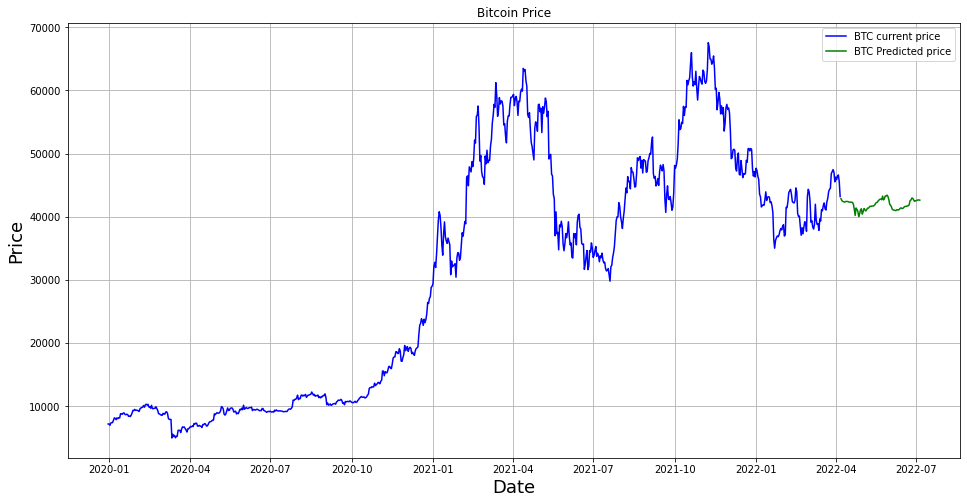

In [23]:
plt.figure(figsize = (16, 8))
plt.grid(True)

plt.plot(data['Close'], color = 'blue', label='BTC current price')
plt.plot(forecast, color = 'green', label='BTC Predicted price')

plt.title('Bitcoin Price')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price', fontsize = 18)
plt.legend()
plt.show()
# px.line(res_data['Close'], x=res_data['Date'], y=res_data['Close'], title='Crypto forecast')
# px.line(forecasting['Close'], x=forecasting['index'], y=forecasting['Close'], title='Crypto forecast')

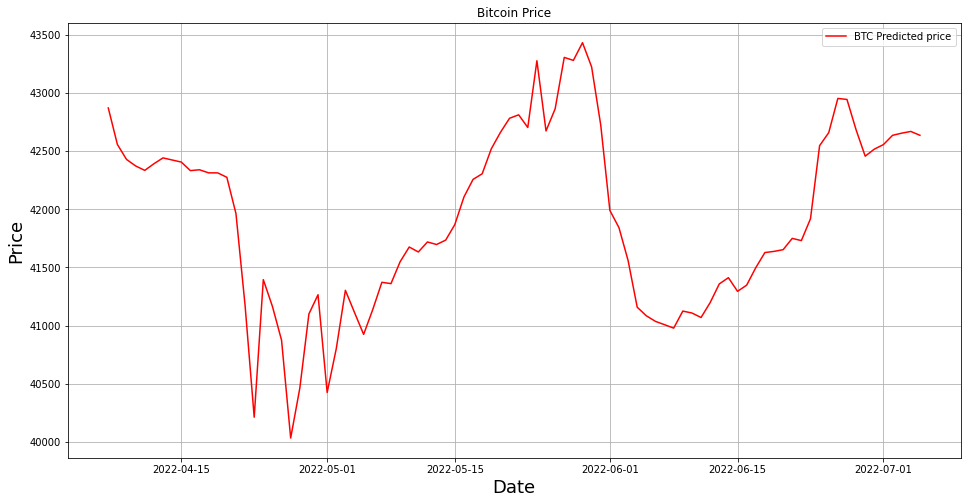

In [24]:
plt.figure(figsize = (16, 8))
plt.grid(True)

# plt.plot(data['Close'], color = 'blue', label='BTC current price')
plt.plot(forecast, color = 'red', label='BTC Predicted price')

plt.title('Bitcoin Price')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Price', fontsize = 18)
plt.legend()
plt.show()

In [25]:
forecasting.to_csv("New data2")